# Analyzing Online Sports Revenue

Sports clothing and athleisure attire is a huge industry, worth approximately [$193 billion in 2021](https://www.statista.com/statistics/254489/total-revenue-of-the-global-sports-apparel-market/) with a strong growth forecast over the next decade! 

In this notebook, you will undertake the role of a product analyst for an online sports clothing company. The company is specifically interested in how it can improve revenue. You will dive into product data such as pricing, reviews, descriptions, and ratings, as well as revenue and website traffic, to produce recommendations for its marketing and sales teams.  

You've been provided with four datasets to investigate:

#  brands.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `brand` | Brand of the product | 

# finance.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `listing_price` | Original price of the product | 
| `sale_price` | Discounted price of the product |
| `discount` | Discount off the listing price, as a decimal | 
| `revenue` | Revenue generated by the product |

# info.csv

| Columns | Description |
|---------|-------------|
| `product_name` | Name of the product | 
| `product_id` | Unique product identifier |
| `description` | Description of the product |

# reviews.csv

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `rating` | Average product rating | 
| `reviews` | Number of reviews for the product |

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in csv files
brands = pd.read_csv("brands.csv") 
finance = pd.read_csv("finance.csv")
info = pd.read_csv("info.csv")
reviews = pd.read_csv("reviews.csv")

# Name dataframes
brands.name = 'brands'
finance.name = 'finance'
info.name = 'info'
reviews.name = 'reviews'

# Create a list of the dataframes to iterate over
dfs = [brands, finance, info, reviews]

# Print name of dataframe and display information to inspect data frame
for df in dfs:
    print(f'{df.name}:\n')
    display(df.info(), df.head(), df.isnull().sum()) 

brands:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  3179 non-null   object
 1   brand       3120 non-null   object
dtypes: object(2)
memory usage: 49.8+ KB


None

,product_id,brand
0,AH2430,NaN
1,G27341,Adidas
2,CM0081,Adidas
3,B44832,Adidas
4,D98205,Adidas


product_id     0
brand         59
dtype: int64

finance:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3179 non-null   object 
 1   listing_price  3120 non-null   float64
 2   sale_price     3120 non-null   float64
 3   discount       3120 non-null   float64
 4   revenue        3120 non-null   float64
dtypes: float64(4), object(1)
memory usage: 124.3+ KB


None

,product_id,listing_price,sale_price,discount,revenue
0,AH2430,NaN,NaN,NaN,NaN
1,G27341,75.99,37.99,0.5,1641.17
2,CM0081,9.99,5.99,0.4,398.93
3,B44832,69.99,34.99,0.5,2204.37
4,D98205,79.99,39.99,0.5,5182.70


product_id        0
listing_price    59
sale_price       59
discount         59
revenue          59
dtype: int64

info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  3120 non-null   object
 1   product_id    3179 non-null   object
 2   description   3117 non-null   object
dtypes: object(3)
memory usage: 74.6+ KB


None

,product_name,product_id,description
0,NaN,AH2430,NaN
1,Women's adidas Originals Sleek Shoes,G27341,"A modern take on adidas sport heritage, tailor..."
2,Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come wi...
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's..."
4,Women's adidas Originals Taekwondo Shoes,D98205,This design is inspired by vintage Taekwondo s...


product_name    59
product_id       0
description     62
dtype: int64

reviews:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  3179 non-null   object 
 1   rating      3120 non-null   float64
 2   reviews     3120 non-null   float64
dtypes: float64(2), object(1)
memory usage: 74.6+ KB


None

,product_id,rating,reviews
0,AH2430,NaN,NaN
1,G27341,3.3,24.0
2,CM0081,2.6,37.0
3,B44832,4.1,35.0
4,D98205,3.5,72.0


product_id     0
rating        59
reviews       59
dtype: int64

In [3]:
a = finance[finance['listing_price'] == finance['listing_price'].min()]
a

,product_id,listing_price,sale_price,discount,revenue
2625,CJ1646-600,0.0,74.95,0.0,0.00
2626,CT4328-101,0.0,74.95,0.0,0.00
2627,CI3482-200,0.0,99.95,0.0,0.00
2628,CD0479-200,0.0,99.95,0.0,0.00
2629,CZ6156-101,0.0,99.95,0.0,0.00
...,...,...,...,...,...
3171,AT7968-606,0.0,49.95,0.0,0.00
3173,CD2722-001,0.0,159.95,0.0,863.73
3174,AT6100-606,0.0,64.95,0.0,0.00
3175,CT9155-063,0.0,139.95,0.0,251.91


Above, I have inspected the data and shown the count of null values in each column for each dataframe. Below, I will merge the frmaes together and remove incomplete data. 

In [4]:
# Chained merge statements on product_id
merged_df = pd.merge(
                pd.merge(
                    pd.merge(brands, finance, on='product_id'), 
                             info, on='product_id'),
                             reviews, on='product_id'
                    ).dropna()

display(merged_df.info(), merged_df.head(), merged_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 3117 entries, 1 to 3178
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3117 non-null   object 
 1   brand          3117 non-null   object 
 2   listing_price  3117 non-null   float64
 3   sale_price     3117 non-null   float64
 4   discount       3117 non-null   float64
 5   revenue        3117 non-null   float64
 6   product_name   3117 non-null   object 
 7   description    3117 non-null   object 
 8   rating         3117 non-null   float64
 9   reviews        3117 non-null   float64
dtypes: float64(6), object(4)
memory usage: 267.9+ KB


None

,product_id,brand,listing_price,sale_price,discount,revenue,product_name,description,rating,reviews
1,G27341,Adidas,75.99,37.99,0.5,1641.17,Women's adidas Originals Sleek Shoes,"A modern take on adidas sport heritage, tailor...",3.3,24.0
2,CM0081,Adidas,9.99,5.99,0.4,398.93,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...,2.6,37.0
3,B44832,Adidas,69.99,34.99,0.5,2204.37,Women's adidas Sport Inspired Questar Ride Shoes,"Inspired by modern tech runners, these women's...",4.1,35.0
4,D98205,Adidas,79.99,39.99,0.5,5182.70,Women's adidas Originals Taekwondo Shoes,This design is inspired by vintage Taekwondo s...,3.5,72.0
5,B75586,Adidas,47.99,19.20,0.6,1555.20,Women's adidas Sport Inspired Duramo Lite 2.0 ...,Refine your interval training in these women's...,1.0,45.0


product_id       0
brand            0
listing_price    0
sale_price       0
discount         0
revenue          0
product_name     0
description      0
rating           0
reviews          0
dtype: int64

Above, I have merged frames together into one that contains and assured the new dataframe contains complete data for each individual product.

## What is the volume of products and average revenue for Adidas and Nike products based on listing price quartiles?

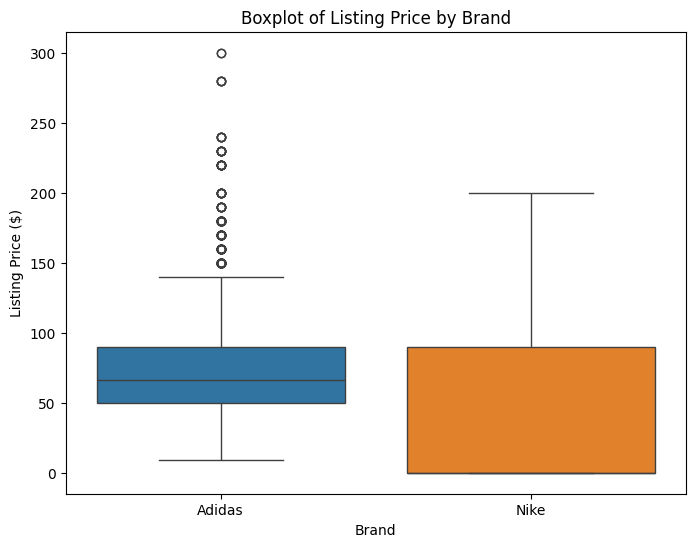

<Figure size 640x480 with 0 Axes>

In [5]:
# Box plot of prices by Brand
plt.figure(figsize=(8,6))
sns.boxplot(data=merged_df, x='brand', y='listing_price', hue='brand')
plt.title('Boxplot of Listing Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Listing Price ($)')
plt.show()
plt.clf()

In [6]:
len(merged_df[(merged_df['listing_price'] == merged_df['listing_price'].min()) & (merged_df['brand'] == 'Nike')])

351

A question should most certainly be asked here. Why is it that there are 351 rows with a listing price of zero? I will come back and deal with this question at a later date.

In [7]:
# Check for types of brands and count rows for each
merged_df['brand'].value_counts()

brand
Adidas    2575
Nike       542
Name: count, dtype: int64

In [8]:
# Create the price point feature which labels the product based on the quartile their listing price is in 
merged_df['price_point'] = pd.qcut(merged_df['listing_price'], q=4, labels=['Budget', 'Average', 'Expensive', 'Elite'])

display(merged_df['price_point'].value_counts())

price_point
Budget       931
Expensive    806
Elite        717
Average      663
Name: count, dtype: int64

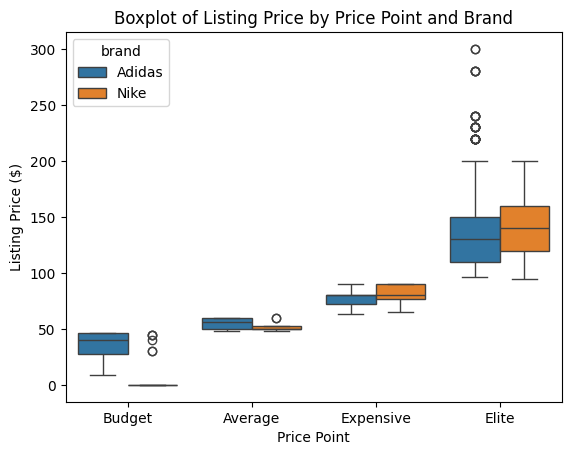

<Figure size 640x480 with 0 Axes>

In [9]:
# Box plot of prices by Brand
plt.figure()
sns.boxplot(data=merged_df, x='price_point', y='listing_price', hue='brand')
plt.title('Boxplot of Listing Price by Price Point and Brand')
plt.xlabel('Price Point')
plt.ylabel('Listing Price ($)')
plt.show()
plt.clf()

In [10]:
adidas_vs_nike = merged_df.groupby(['brand', 'price_point'], as_index=False).agg(num_products=('price_point', 'count'), mean_revenue=('revenue', 'mean')).round(2)

print(adidas_vs_nike)

    brand price_point  num_products  mean_revenue
0  Adidas      Budget           574       2015.68
1  Adidas     Average           655       3035.30
2  Adidas   Expensive           759       4621.56
3  Adidas       Elite           587       8302.78
4    Nike      Budget           357       1596.33
5    Nike     Average             8        675.59
6    Nike   Expensive            47        500.56
7    Nike       Elite           130       1367.45


C:\Users\widej\AppData\Local\Temp\ipykernel_11100\3010910618.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adidas_vs_nike = merged_df.groupby(['brand', 'price_point'], as_index=False).agg(num_products=('price_point', 'count'), mean_revenue=('revenue', 'mean')).round(2)


Below, I rerun the analysis with the sale price instead of the list price. I am doing this to remove what is most likely inaccurate data. 

In [11]:
# Create the price point feature which labels the product based on the quartile their listing price is in 
merged_df['price_point'] = pd.qcut(merged_df['sale_price'], q=4, labels=['Budget', 'Average', 'Expensive', 'Elite'])

display(merged_df['price_point'].value_counts())

price_point
Budget       872
Elite        776
Expensive    770
Average      699
Name: count, dtype: int64

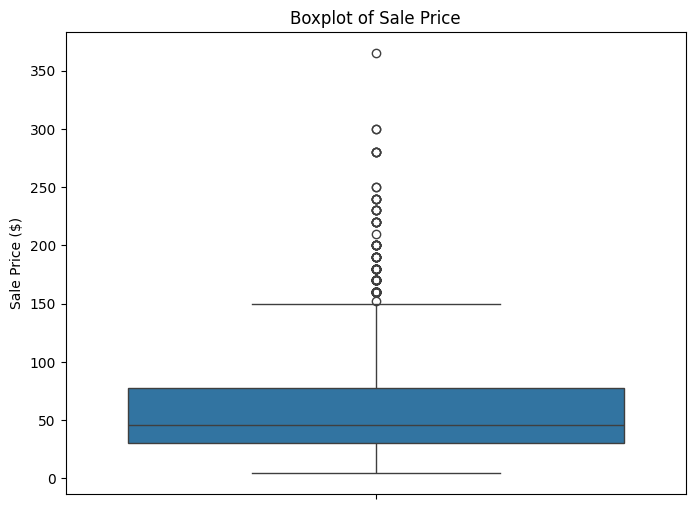

<Figure size 640x480 with 0 Axes>

In [12]:
# Box plot of prices by Brand
plt.figure(figsize=(8,6))
sns.boxplot(data=merged_df, y='sale_price')
plt.title('Boxplot of Sale Price')
plt.ylabel('Sale Price ($)')
plt.show()
plt.clf()

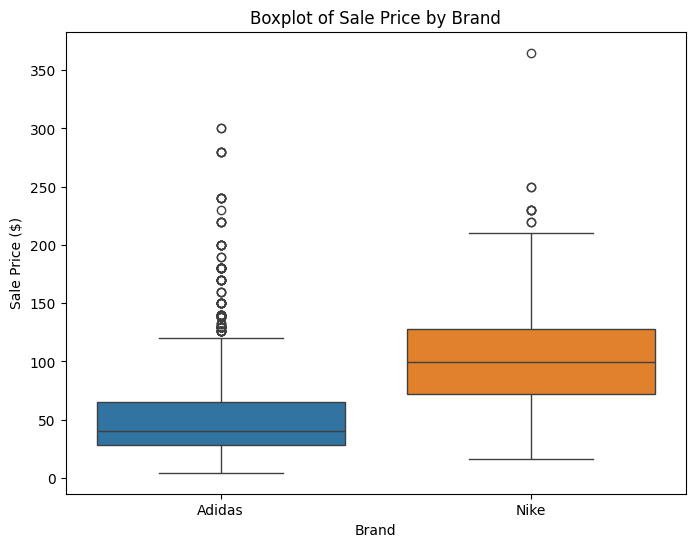

<Figure size 640x480 with 0 Axes>

In [13]:
# Box plot of prices by Brand
plt.figure(figsize=(8,6))
sns.boxplot(data=merged_df, x='brand', y='sale_price', hue='brand')
plt.title('Boxplot of Sale Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Sale Price ($)')
plt.show()
plt.clf()

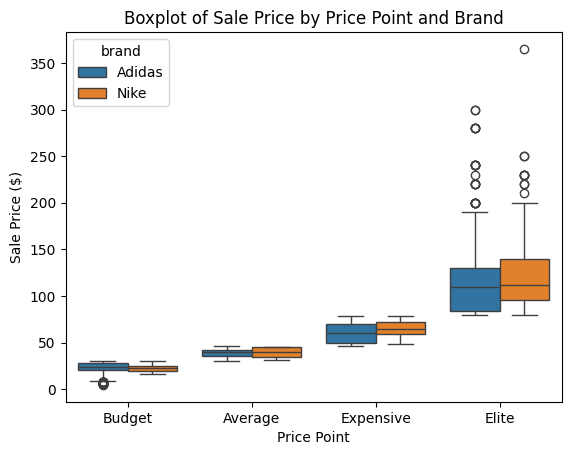

<Figure size 640x480 with 0 Axes>

In [14]:
# Box plot of prices by Brand
plt.figure()
sns.boxplot(data=merged_df, x='price_point', y='sale_price', hue='brand')
plt.title('Boxplot of Sale Price by Price Point and Brand')
plt.xlabel('Price Point')
plt.ylabel('Sale Price ($)')
plt.show()
plt.clf()

In [15]:
adidas_vs_nike_sp = merged_df.groupby(['brand', 'price_point'], as_index=False).agg(num_products=('price_point', 'count'), mean_revenue=('revenue', 'mean')).round(2)

display(adidas_vs_nike_sp, adidas_vs_nike)

C:\Users\widej\AppData\Local\Temp\ipykernel_11100\2307950561.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adidas_vs_nike_sp = merged_df.groupby(['brand', 'price_point'], as_index=False).agg(num_products=('price_point', 'count'), mean_revenue=('revenue', 'mean')).round(2)


,brand,price_point,num_products,mean_revenue
0,Adidas,Budget,860,2049.10
1,Adidas,Average,678,3399.73
2,Adidas,Expensive,633,5522.18
3,Adidas,Elite,404,9811.47
4,Nike,Budget,12,274.39
5,Nike,Average,21,310.67
6,Nike,Expensive,137,870.26
7,Nike,Elite,372,1740.71


,brand,price_point,num_products,mean_revenue
0,Adidas,Budget,574,2015.68
1,Adidas,Average,655,3035.30
2,Adidas,Expensive,759,4621.56
3,Adidas,Elite,587,8302.78
4,Nike,Budget,357,1596.33
5,Nike,Average,8,675.59
6,Nike,Expensive,47,500.56
7,Nike,Elite,130,1367.45


The incorrect data in the Nike list price column has contributed to a significant difference between the tables adidas_vs_nike_sp (Created using Sale Price) and adidas_vs_nike (Created using Listing Price). The several hundred rows that contained a listing price of zero dramatically shifted the quartile ranges which directly impacted the num of products in each price point. Due to the dramatic shift in number of products, Nike went from their highest average revenue being in the Budget category to having the highest average revenue in the Elite category. I highly recommend for the time being, using sale price in lieu of the the listing price when doing analysis that depends on the Nike listing price column. 

## Do any differences exist between the word count of a product's description and its mean rating?

In [16]:
merged_df['description'].str.len().agg(['min', 'max', 'mean', 'std'])

min      14.000000
max     687.000000
mean    265.553096
std      74.773811
Name: description, dtype: float64

In [17]:
merged_df['rating'].agg(['min', 'max', 'mean', 'std'])

min     0.000000
max     5.000000
mean    3.265159
std     1.393041
Name: rating, dtype: float64

In [18]:
merged_df['reviews'].agg(['min', 'max', 'mean', 'std'])

min       0.000000
max     223.000000
mean     41.552133
std      31.366272
Name: reviews, dtype: float64

In [19]:
merged_df['description_length_actual'] = merged_df['description'].str.len()

bins_lens = [x for x in range(0, 800, 100)]
bin_labels = [str(x) for x in bins_lens][1:]

merged_df['description_length'] = pd.cut(merged_df['description_length_actual'], bins=bins_lens, labels=bin_labels)

description_lengths = merged_df.groupby('description_length', as_index=False).agg(mean_rating=('rating', 'mean'), num_reviews = ('reviews', 'count')).round(2)

display(description_lengths)

C:\Users\widej\AppData\Local\Temp\ipykernel_11100\315777364.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  description_lengths = merged_df.groupby('description_length', as_index=False).agg(mean_rating=('rating', 'mean'), num_reviews = ('reviews', 'count')).round(2)


,description_length,mean_rating,num_reviews
0,100,2.26,7
1,200,3.19,526
2,300,3.28,1785
3,400,3.29,651
4,500,3.35,118
5,600,3.12,15
6,700,3.65,15


In [20]:
merged_df['rating'].corr(merged_df['description_length_actual'])

0.02882679151049261

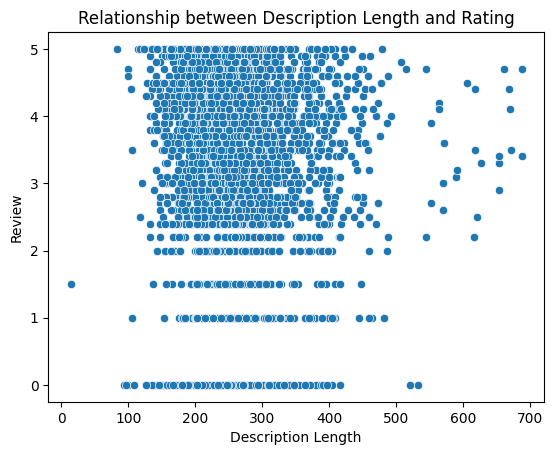

<Figure size 640x480 with 0 Axes>

In [21]:
# Scatter plot of rating and description length
plt.figure()
sns.scatterplot(data=merged_df, x='description_length_actual', y='rating')
plt.title('Relationship between Description Length and Rating')
plt.xlabel('Description Length')
plt.ylabel('Review')
plt.show()
plt.clf()

There is a small positive correlation between the length of the description and the Rating. 

This would be a good spot to do a two tailed test on the null hypothesis that the length of the description doesn't have a positive or negative impact on the rating.

This might also be a good spot for the creation of a correlation heat map showing the variables, if any, that would be most likely to impact rating.

## How does the volume of products and median revenue vary between clothing and footwear?

In [22]:
# Search description feature for words 'shoe*', 'trainer', or 'foot*'
search_terms = ['shoe*', 'trainer*', 'foot*']
pattern = '|'.join(search_terms)

merged_df['product_type'] = merged_df['description'].str.contains(pattern).map(lambda x: 'shoe' if x else 'clothing')

display(merged_df['product_type'].value_counts())

product_type
shoe        2639
clothing     478
Name: count, dtype: int64

In [23]:
clothing_df = merged_df[merged_df['product_type'] == 'clothing']
shoes_df = merged_df[merged_df['product_type'] == 'shoe']

clothing_summary = pd.DataFrame({'num_clothing_products':[len(clothing_df)], 'median_clothing_revenue':[clothing_df['revenue'].median()]})

shoes_summary = pd.DataFrame({'num_footwear_products':[len(shoes_df)], 'median_footwear_revenue':[shoes_df['revenue'].median()]})

product_types = pd.concat([clothing_summary, shoes_summary], axis=1)

product_types

,num_clothing_products,median_clothing_revenue,num_footwear_products,median_footwear_revenue
0,478,625.07,2639,3073.3


The number of clothing products vs footwear products is much lower. The median revenue per clothing item is also much lower relative to footwear products in this data set. 